<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Anomaly_Detection_in_Transactions_Finance_Sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic transaction data
num_samples = 1000
data = pd.DataFrame({
    'transaction_id': range(1, num_samples + 1),
    'amount': np.random.normal(100, 20, num_samples),      # normal distribution for transaction amounts
    'transaction_time': np.random.normal(12, 2, num_samples),  # transaction time (hour of the day)
    'customer_age': np.random.normal(35, 10, num_samples),  # age of customer
    'transaction_type': np.random.choice([1, 2, 3], num_samples, p=[0.7, 0.2, 0.1])  # transaction types
})

# Introduce anomalies
anomalies = int(0.05 * num_samples)  # 5% anomalies
data.loc[np.random.choice(data.index, anomalies, replace=False), 'amount'] *= 10  # Inflate some transactions

print("Synthetic Transaction Data:")
print(data.head())


Synthetic Transaction Data:
   transaction_id      amount  transaction_time  customer_age  \
0               1  109.934283         14.798711     28.248217   
1               2   97.234714         13.849267     33.554813   
2               3  112.953771         12.119261     27.075801   
3               4  130.460597         10.706126     31.920385   
4               5   95.316933         13.396447     16.063853   

   transaction_type  
0                 2  
1                 3  
2                 1  
3                 3  
4                 1  


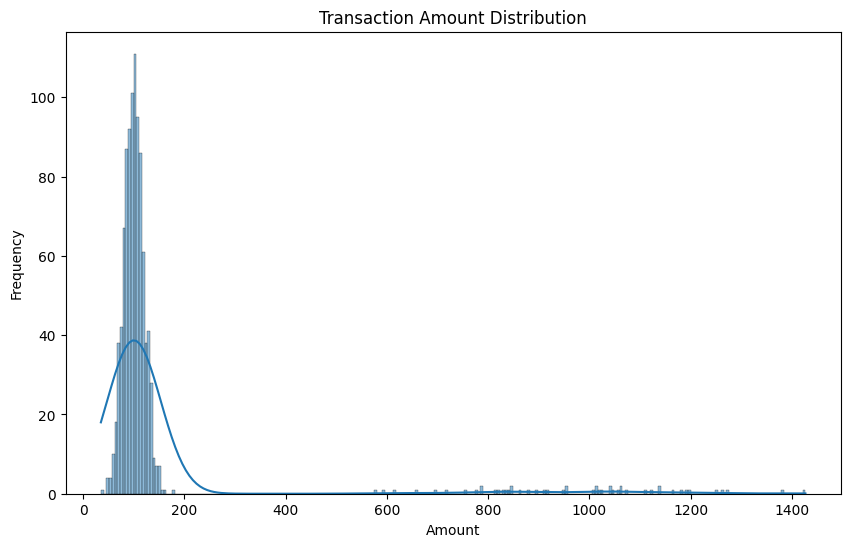

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot transaction amounts to spot anomalies
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


In [3]:
from sklearn.ensemble import IsolationForest

# Select features for anomaly detection
features = data[['amount', 'transaction_time', 'customer_age', 'transaction_type']]

# Define and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # assuming 5% anomalies
data['anomaly_iforest'] = iso_forest.fit_predict(features)

# Mark anomalies as 1 and normal as 0
data['anomaly_iforest'] = data['anomaly_iforest'].apply(lambda x: 1 if x == -1 else 0)

# Count anomalies
print("Anomalies detected by Isolation Forest:", data['anomaly_iforest'].sum())


Anomalies detected by Isolation Forest: 50


In [4]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Scale the data for One-Class SVM
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Define and fit the One-Class SVM model
svm = OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)  # nu corresponds to the contamination rate
data['anomaly_svm'] = svm.fit_predict(features_scaled)

# Mark anomalies as 1 and normal as 0
data['anomaly_svm'] = data['anomaly_svm'].apply(lambda x: 1 if x == -1 else 0)

# Count anomalies
print("Anomalies detected by One-Class SVM:", data['anomaly_svm'].sum())


Anomalies detected by One-Class SVM: 48


In [5]:
# Evaluate the detection rates for each model
anomalies_actual = anomalies  # 5% of the dataset
anomalies_iforest = data['anomaly_iforest'].sum()
anomalies_svm = data['anomaly_svm'].sum()

print(f"True Anomalies: {anomalies_actual}")
print(f"Isolation Forest detected {anomalies_iforest} anomalies.")
print(f"One-Class SVM detected {anomalies_svm} anomalies.")


True Anomalies: 50
Isolation Forest detected 50 anomalies.
One-Class SVM detected 48 anomalies.


In [6]:
# Evaluate the detection rates for each model
anomalies_actual = anomalies  # 5% of the dataset
anomalies_iforest = data['anomaly_iforest'].sum()
anomalies_svm = data['anomaly_svm'].sum()

print(f"True Anomalies: {anomalies_actual}")
print(f"Isolation Forest detected {anomalies_iforest} anomalies.")
print(f"One-Class SVM detected {anomalies_svm} anomalies.")


True Anomalies: 50
Isolation Forest detected 50 anomalies.
One-Class SVM detected 48 anomalies.


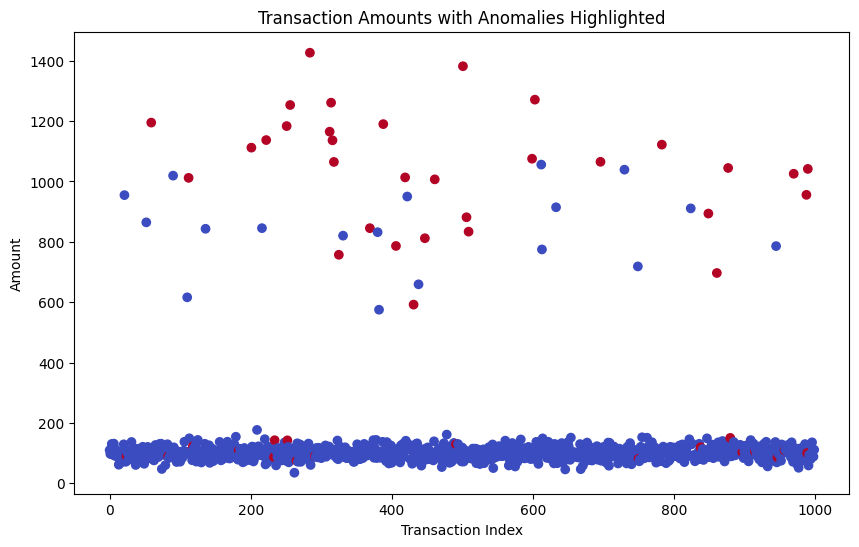

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['amount'], c=data['anomaly_iforest'], cmap='coolwarm', label='Anomaly')
plt.title("Transaction Amounts with Anomalies Highlighted")
plt.xlabel("Transaction Index")
plt.ylabel("Amount")
plt.show()
